# Entrenamiento con datos de entrenamiento
<hr>

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [78]:
X = pd.read_csv("../Reducción descriptores/BBB_h.csv")

In [79]:
X.head()

,MaxEStateIndex,qed,SPS,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan3,BCUT2D_MWHI,AvgIpc,Chi4n,...,fr_furan,fr_ketone_Topliss,fr_lactam,fr_morpholine,fr_para_hydroxylation,fr_piperdine,fr_piperzine,fr_sulfide,fr_tetrazole,fr_thiazole
0,0.692714,0.566809,0.177505,0.328059,0.663112,0.414596,0.604396,0.175988,0.597016,0.100222,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
1,0.740398,0.132027,0.341697,0.326844,0.688957,0.607488,0.695726,0.175408,0.725694,0.177883,...,0.0,0.0,0.5,0.0,0.0,0.00,0.0,0.25,1.0,0.0
2,0.541892,0.799509,0.164875,0.331318,0.302673,0.695652,0.846154,0.999956,0.478667,0.053087,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
3,0.479617,0.280131,0.169213,0.528428,0.399398,0.791762,0.899595,0.590981,0.536565,0.058511,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.25,0.0,0.0
4,0.642439,0.359106,0.703631,0.361003,0.655845,0.520422,0.743590,0.040912,0.700605,0.302560,...,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.00,0.0,0.0


In [80]:
X.shape

(7807, 58)

In [81]:
X.fillna(method='ffill', inplace=True)


C:\Users\Eliud\AppData\Local\Temp\ipykernel_22556\419284443.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [82]:
df = pd.read_csv("../Descriptores calculados/BBB_descriptores.csv")

In [83]:
df

,SMILES,BBB+/BBB-,group,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,A,12.341010,12.341010,0.023055,-3.794932,0.540588,11.428571,398.400,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,A,13.190522,13.190522,0.042537,-2.144257,0.133795,22.000000,520.480,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,A,9.654043,9.654043,0.195000,0.195000,0.758308,10.615385,305.502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,A,8.544584,8.544584,0.532052,0.532052,0.272365,10.894737,342.266,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,A,11.445328,11.445328,0.165306,-1.798901,0.346256,45.303030,461.467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,BBB-,D,4.506501,4.506501,0.832250,0.832250,0.899820,13.700000,265.360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7803,CCOCCn1c(N2CCCN(C)CC2)nc2ccccc21,BBB+,D,5.564458,5.564458,0.733727,0.733727,0.793110,17.090909,302.422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7804,CN1CCC(=C2c3ccccc3CC(=O)c3sccc32)CC1,BBB+,D,12.589347,12.589347,0.264794,0.264794,0.732528,18.863636,309.434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7805,Cc1[nH]c(=O)c(C#N)cc1-c1ccncc1,BBB-,D,11.364205,11.364205,0.122604,-0.349254,0.778670,9.750000,211.224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
y = df["BBB+/BBB-"]

In [85]:
y

0       BBB-
1       BBB-
2       BBB-
3       BBB-
4       BBB-
        ... 
7802    BBB-
7803    BBB+
7804    BBB+
7805    BBB-
7806    BBB-
Name: BBB+/BBB-, Length: 7807, dtype: object

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
pipe = Pipeline([
    ('svc', SVC())
])

In [88]:
param_grid = {
    'svc__C': [10, 100, 1000, 10000],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf', "poly"]
}

In [89]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [90]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ...........svc__C=10, svc__gamma=1, svc__kernel=rbf; total time=   1.4s
[CV] END ...........svc__C=10, svc__gamma=1, svc__kernel=rbf; total time=   1.2s
[CV] END ...........svc__C=10, svc__gamma=1, svc__kernel=rbf; total time=   1.2s
[CV] END ...........svc__C=10, svc__gamma=1, svc__kernel=rbf; total time=   1.3s
[CV] END ...........svc__C=10, svc__gamma=1, svc__kernel=rbf; total time=   1.3s
[CV] END ..........svc__C=10, svc__gamma=1, svc__kernel=poly; total time=   4.0s
[CV] END ..........svc__C=10, svc__gamma=1, svc__kernel=poly; total time=   2.5s
[CV] END ..........svc__C=10, svc__gamma=1, svc__kernel=poly; total time=   1.9s
[CV] END ..........svc__C=10, svc__gamma=1, svc__kernel=poly; total time=   1.9s
[CV] END ..........svc__C=10, svc__gamma=1, svc__kernel=poly; total time=   2.0s
[CV] END .........svc__C=10, svc__gamma=0.1, svc__kernel=rbf; total time=   0.5s
[CV] END .........svc__C=10, svc__gamma=0.1, sv

GridSearchCV(cv=5, estimator=Pipeline(steps=[('svc', SVC())]),
             param_grid={'svc__C': [10, 100, 1000, 10000],
                         'svc__gamma': [1, 0.1, 0.01, 0.001],
                         'svc__kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [91]:
grid_search.best_params_

{'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'rbf'}

In [92]:
grid_search.best_score_

0.8739791833466773

# Entrenamiento con los datos de prueba
<hr>

In [101]:
pipe = Pipeline([
    ('svc', SVC(C=10, gamma=1, kernel="rbf", probability=True))
])

In [102]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('svc', SVC(C=10, gamma=1, probability=True))])

# Resultados del modelo
<hr>

In [103]:
y_predicha = pipe.predict(X_test)

In [104]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.88
Recall 0.88
precision 0.88
f1 0.88


In [105]:
y_entrenamiento = pipe.predict(X_train)

In [106]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.954
Recall 0.954
precision 1.0
f1 0.954


# Confusion Matrix
<hr>

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [108]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

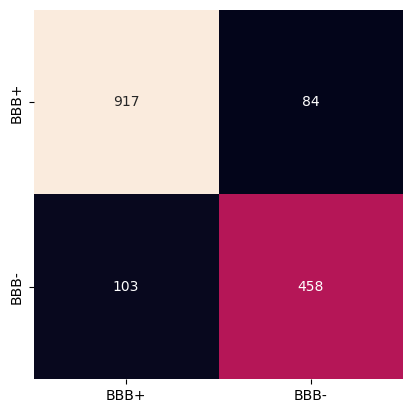

In [109]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["BBB+/BBB-"].value_counts().index, yticklabels=df["BBB+/BBB-"].value_counts().index)

# Guardar modelo
<hr>

In [110]:
import joblib

In [113]:
joblib.dump(pipe, '../GuardadoDeModelos MD/modelo_SVM.joblib')

['../GuardadoDeModelos MD/modelo_SVM.joblib']